In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/winequality-red (1).csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


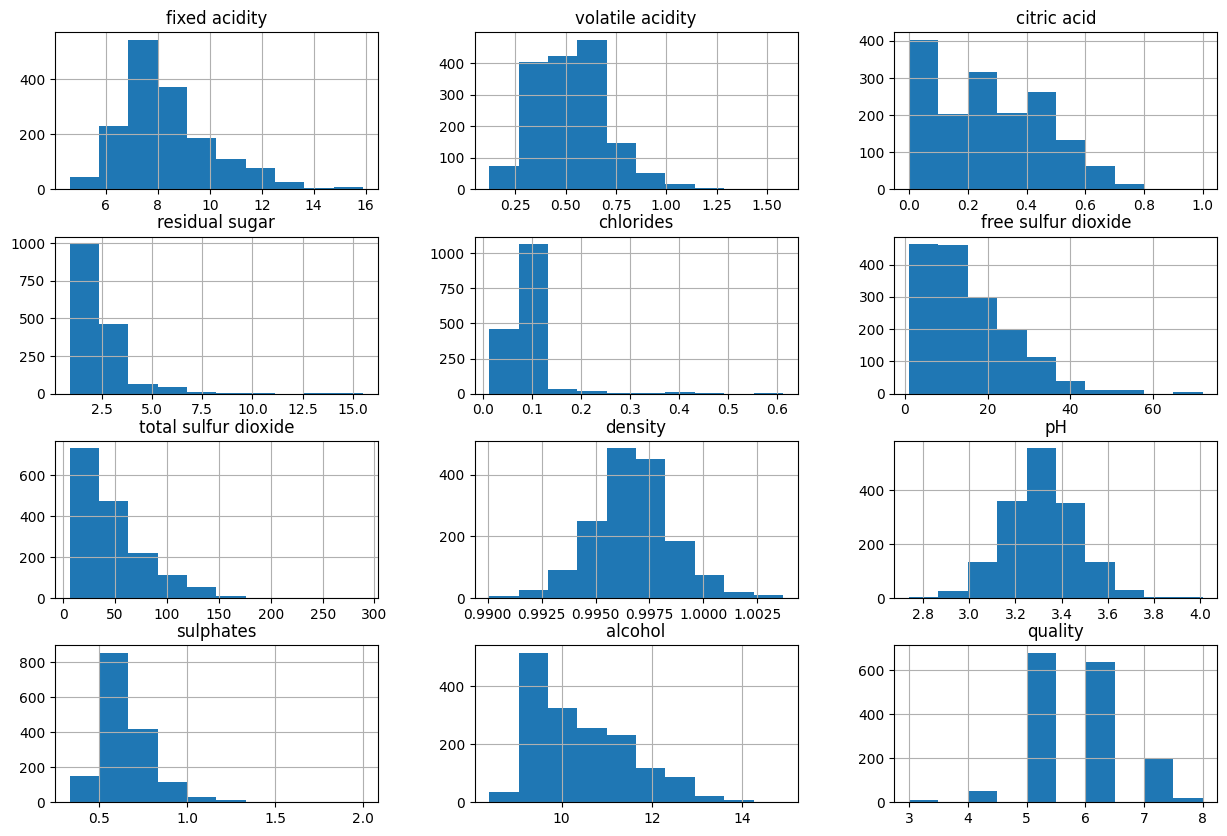

In [12]:
graph_val = data.select_dtypes(['float64','int64','int32'])
graph_val.hist(figsize = (15,10))
plt.show()

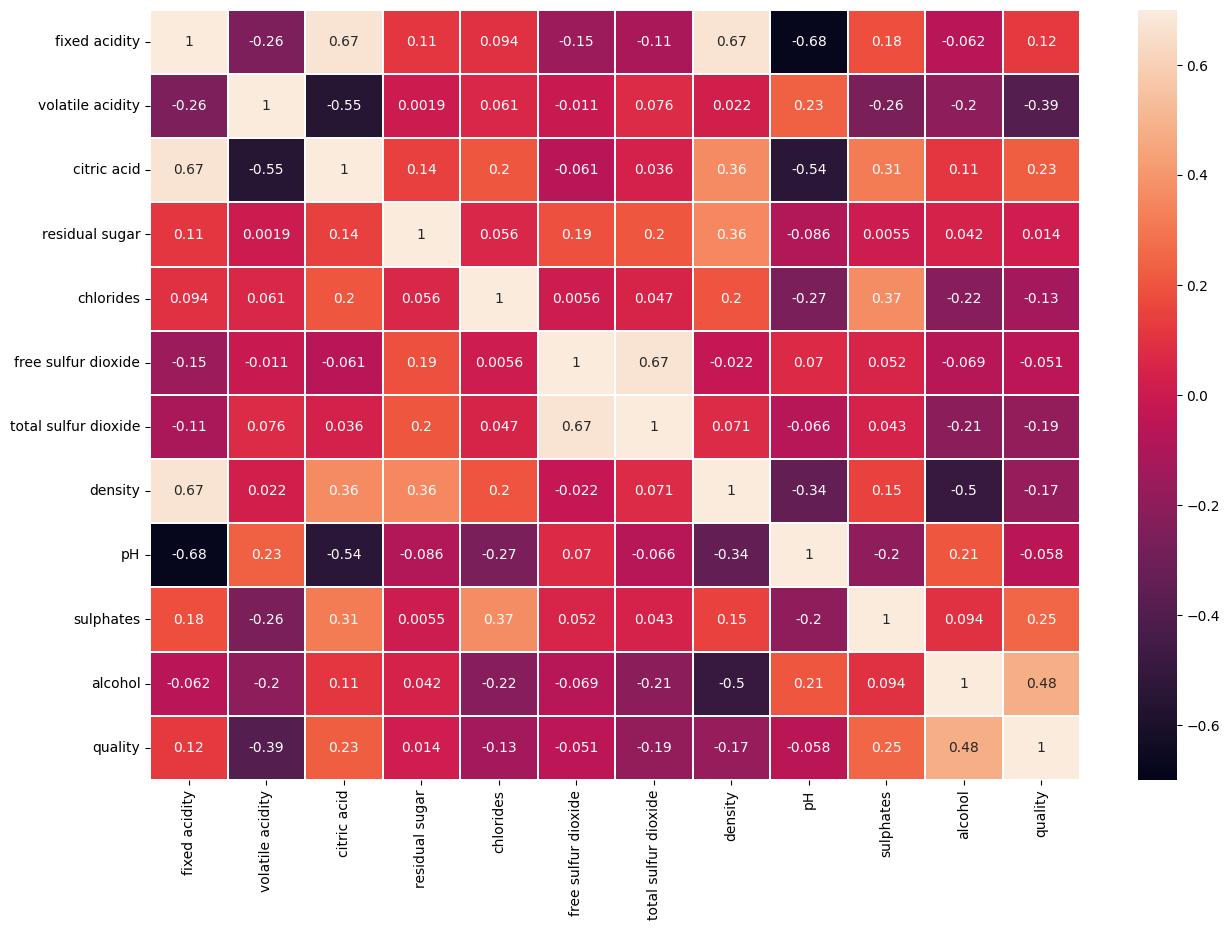

In [14]:
#check correlation

plt.subplots(figsize = (15,10))
sns.heatmap(data.corr(),vmin = -0.7, vmax = 0.7, annot = True, linewidths = 0.2)
plt.show()

from heatmap, citric acid and fixed acidity has high correlation, so drop one with less correlation with quality
similarly for free and total sulphur
density and fixed acidity

In [15]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
data.drop(['fixed acidity','free sulfur dioxide','density'], axis = 1, inplace = True)

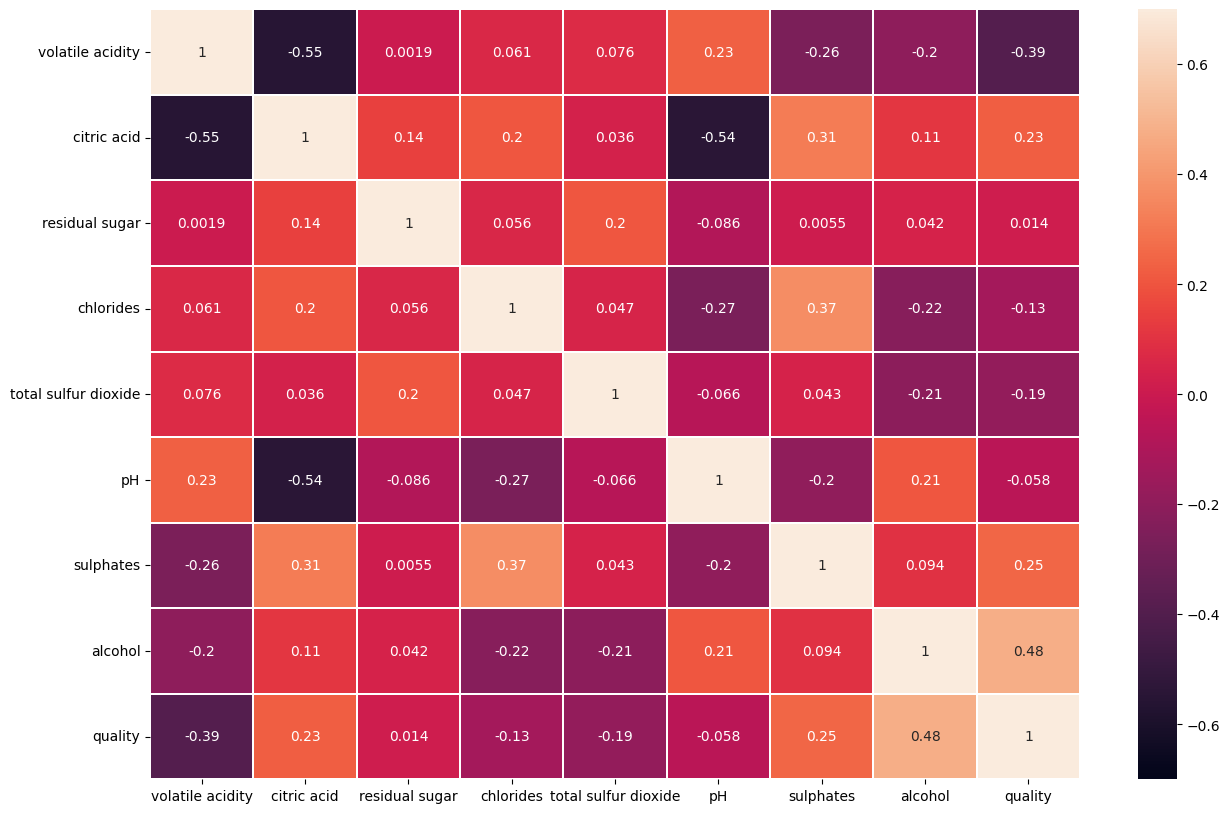

In [17]:
#check correlation

plt.subplots(figsize = (15,10))
sns.heatmap(data.corr(),vmin = -0.7, vmax = 0.7, annot = True, linewidths = 0.2)
plt.show()

In [19]:
y = data['quality']
X = data.drop(['quality'], axis =1)

In [20]:
X.shape

(1599, 8)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

#75% used for training machine and 25% for prediction
#random state:to get same split

In [22]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [23]:
pred_lin = model.predict(X_test)
pred_lin

array([5.36573498, 5.07721369, 5.60698274, 5.39140074, 5.72969707,
       5.21333352, 5.09687179, 5.13821023, 5.75687072, 5.69698188,
       6.1597745 , 5.26198819, 5.54418606, 5.20924318, 5.41559645,
       6.49914113, 5.20021116, 5.59170724, 6.59225973, 5.31259464,
       5.45007367, 5.18916904, 5.98702503, 6.42238211, 5.36569034,
       5.43228543, 6.39936141, 5.39404074, 5.16299376, 6.17266341,
       5.28343432, 5.59746345, 5.78576466, 5.38225279, 5.45861267,
       5.06846554, 6.18787978, 5.72387681, 5.62119428, 6.2126    ,
       5.49319541, 5.29621209, 6.19518032, 5.2264394 , 5.85454011,
       5.82197098, 6.42923069, 5.57184348, 5.16874304, 5.586664  ,
       5.15379748, 5.10317495, 5.61548557, 6.45194053, 5.02201755,
       5.06598232, 6.01545709, 5.49104996, 5.84592793, 5.26518367,
       5.63978429, 5.98036776, 5.27944843, 5.34903789, 6.43413819,
       5.37562983, 6.3607748 , 5.31080635, 6.49376965, 5.29196656,
       6.45490511, 4.76722094, 5.80564046, 5.84684295, 6.19557

In [24]:
#to check model goodness

from sklearn.metrics import mean_squared_error
print('MSE is: ', mean_squared_error(y_test, pred_lin))

#better if closer to 0

MSE is:  0.3891025192103126


In [25]:
#other methods to check error

from sklearn.metrics import r2_score
print('R2 score is: ',r2_score(y_test, pred_lin))

R2 score is:  0.3709886024384944


In [31]:
df = pd.read_excel('/content/iris_1 (1).xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.shape

(150, 5)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SW              150 non-null    float64
 1   PW              150 non-null    float64
 2   Classification  150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


In [37]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [35]:
#label encoding classification
import sklearn.preprocessing as sk
x_le = sk.LabelEncoder()
df['Classification'] = x_le.fit_transform(df['Classification'])

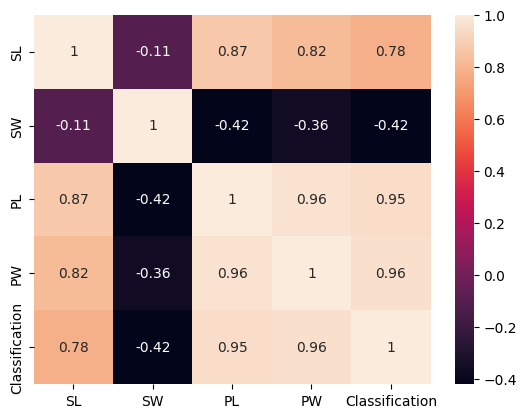

In [36]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [38]:
#dropping highly correlated columns
df.drop(['PL', 'SL'], axis = 1, inplace = True)

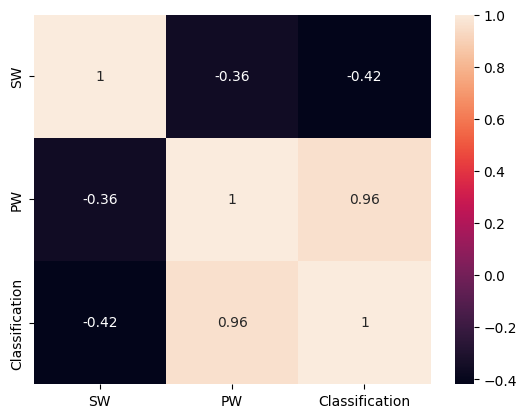

In [39]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [43]:
y_iris = df['Classification']
X_iris = df.drop(['Classification'], axis =1)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state = 42, test_size = .25)

In [45]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model_iris = lm.fit(X_train, y_train)

In [47]:
pred_iris = model_iris.predict(X_test)
pred_iris

array([ 1.0599064 , -0.02829968,  2.18877461,  1.3373668 ,  1.25799922,
        0.14946208,  1.13927397,  2.09038043,  1.47511865,  1.07958523,
        1.77356236, -0.06896181, -0.06830958, -0.08864065, -0.02829968,
        1.35769787,  2.01101285,  1.01989649,  1.15895281,  2.05037052,
       -0.00927307,  1.6148272 ,  0.14946208,  1.95132411,  1.65548934,
        2.11005927,  1.71322138,  2.07070159,  0.12913101,  0.01040576,
       -0.08798842, -0.04732628,  1.19896271, -0.04863075, -0.00927307,
        1.81226779,  1.27833029, -0.06830958])

In [48]:
#to check model goodness

from sklearn.metrics import mean_squared_error
print('MSE is: ', mean_squared_error(y_test, pred_iris))

#better if closer to 0

MSE is:  0.034352020483509084
